# Load the Data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the passenger data
passengers = pd.read_csv("passengers.csv")
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# Clean the Data

In [76]:
# Update sex column to numerical
print(set(passengers.Sex))
print(passengers.Sex)
passengers.replace("female", 1, inplace = True)
passengers.replace("male", 0, inplace = True)
passengers.Sex

{'male', 'female'}
0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [77]:
# Fill the nan values in the age column
print(passengers.Age)
age_mean = int(passengers.Age.mean())
passengers.Age.fillna(
    value = age_mean,
    inplace = True
)
print(passengers.Age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [78]:
# Create a first class column
add_class = lambda row, p_class: 1 if row == p_class else 0

print(passengers.Pclass)
print(set(passengers.Pclass))
passengers["FirstClass"] = passengers.Pclass.apply(add_class, args = (1,))
passengers.head()

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64
{1, 2, 3}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [79]:
# Create a second class column
passengers["SecondClass"] = passengers.Pclass.apply(add_class, args = (2,))
passengers.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.0,1,2,W./C. 6607,23.45,NaN,S,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,Q,0,0


# Select and Split the Data

In [80]:
# Select the desired features

features = passengers[["Sex", "Age", "FirstClass", "SecondClass"]]
features.head()

,Sex,Age,FirstClass,SecondClass
0,0,22.0,0,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [81]:
survival = passengers.Survived
print(type(survival))
survival.head()

<class 'pandas.core.series.Series'>


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
# Perform train, test, split

X_train, X_test, y_train, y_test = train_test_split(
    features,
    survival,
    test_size = 0.2,
    random_state = 1
)
X_train

,Sex,Age,FirstClass,SecondClass
301,0,29.0,0,0
309,1,30.0,1,0
516,1,34.0,0,1
120,0,21.0,0,1
570,0,62.0,0,1
...,...,...,...,...
715,0,19.0,0,0
767,1,30.5,0,0
72,0,21.0,0,1
235,1,29.0,0,0


# Normalize the Data

In [83]:
# Scale the feature data so it has mean = 0 and standard deviation = 1

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.73334642, -0.0701322 , -0.56870034, -0.51662744],
       [ 1.36361202,  0.00524917,  1.7583953 , -0.51662744],
       [ 1.36361202,  0.30677464, -0.56870034,  1.93563082],
       ...,
       [-0.73334642, -0.67318314, -0.56870034,  1.93563082],
       [ 1.36361202, -0.0701322 , -0.56870034, -0.51662744],
       [-0.73334642, -0.67318314, -0.56870034, -0.51662744]])

# Create and Evaluate the Model

In [84]:
# Create and train the model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

model.coef_     # a vector of the coefficients of each feature

array([[ 1.25029533, -0.45488636,  1.02822528,  0.55399261]])

In [85]:
model.intercept_

array([-0.7000056])

In [86]:
# Score the model on the train data

model.score(X_train_scaled, y_train)     # The score returned is the percentage of correct classifications, or the accuracy.

0.797752808988764

In [87]:
# Score the model on the test data

model.score(X_test_scaled, y_test)

0.8044692737430168

In [88]:
# Analyze the coefficients
model.coef_     # a vector of the coefficients of each feature
print(list(zip(X_train.columns, model.coef_[0])))

[('Sex', 1.2502953312330605), ('Age', -0.45488635562813673), ('FirstClass', 1.028225283201969), ('SecondClass', 0.5539926112161626)]


In [89]:
print("The Sex feauter is the most important in predicting survival on the sinking of the Titanic.")

The Sex feauter is the most important in predicting survival on the sinking of the Titanic.


# Predict with the Model

In [90]:
# Sample passenger features
Jack = np.array([
  0.0,    # Sex
  20.0,   # Age
  0.0,    # FirstClass
  0.0     # SecondClass
])
Rose = np.array([
  1.0,
  17.0,
  1.0,
  0.0
])
You = np.array([
  0.0,
  48.0,
  0.0,
  0.0
])


In [91]:
# Combine passenger arrays
sample_passengers = np.array([Jack, Rose, You])



In [92]:
# Scale the sample passenger features
sample_passengers_scaled = scaler.transform(sample_passengers)
sample_passengers_scaled

array([[-0.73334642, -0.74856451, -0.56870034, -0.51662744],
       [ 1.36361202, -0.97470861,  1.7583953 , -0.51662744],
       [-0.73334642,  1.36211378, -0.56870034, -0.51662744]])

In [93]:
# Make survival predictions!
prediction = model.predict(sample_passengers_scaled)
prediction

array([0, 1, 0], dtype=int64)

In [94]:
probabilities = model.predict_proba(sample_passengers_scaled)
probabilities

array([[0.89542119, 0.10457881],
       [0.0487945 , 0.9512055 ],
       [0.95719991, 0.04280009]])

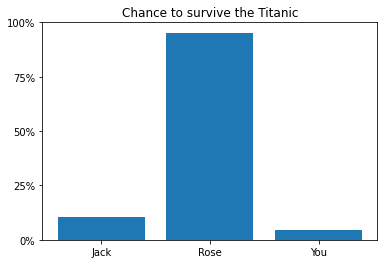

In [95]:
x = range(len(sample_passengers))
y = probabilities[:, 1]
plt.bar(
  x,
  y * 100
)
plt.yticks(np.arange(0, 101, 25), ("0%", "25%", "50%", "75%", "100%"))
plt.xticks(np.arange(3), ("Jack", "Rose", "You"))
plt.title("Chance to survive the Titanic")

plt.show()